In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import tree
import seaborn as sns
import numpy as np
from functools import reduce
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

In [2]:
df = pd.read_csv("df.csv")

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3071: DtypeWarning: Columns (0,4,5,6,8,9,11,12,13,14,15,16,17,18,19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['predictions'].value_counts()

1.0    31184
0.0     1633
Name: predictions, dtype: int64

In [4]:
df

,Name,Age,Gender,Race,Date,City,State,Zipcode,County,Agency,...,armedStatus,allegedWeapon,allegedThreat,Fleeing,bodyCam,offDuty,num_race,num_gender,predictions,dt_predictions
0,John Eric Ostbye,50,Male,White,2021-01-25,Graham,WA,98338.0,Pierce,Pierce County Sheriff's Office,...,Allegedly Armed,knife,other,not fleeing,NaN,NaN,0,0,1.0,0.0
1,Tyree Kajawn Rogers,38,Male,Black,2021-01-24,Wichita Falls,TX,76305.0,Wichita Falls,Wichita County Sheriff's Office,...,Vehicle,vehicle,attack,car,no,NaN,1,0,1.0,0.0
2,Caleb McCree,43,Male,White,2021-01-24,Slidell,LA,70460.0,St. Tammany,"Slidell Police Department, St. Tammany Parish ...",...,Allegedly Armed,box cutter,attack,NaN,no,NaN,0,0,1.0,0.0
3,Ryan Daniel Stallings,33,Male,White,2021-01-21,College Station,TX,77840.0,Brazos,College Station Police Department,...,Allegedly Armed,gun,other,not fleeing,no,NaN,0,0,1.0,0.0
4,David Tovar Jr.,27,Male,Hispanic,2021-01-21,San Jose,CA,95127.0,Santa Clara,San Jose Police Department,...,Unclear,undetermined,other,NaN,no,NaN,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,NaN,47,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
32813,NaN,49,Female,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1.0,1.0
32814,NaN,44,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
32815,NaN,65,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,1.0


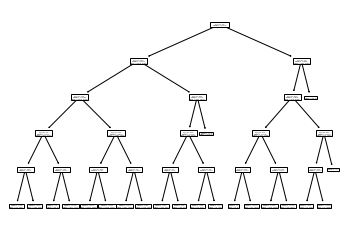

Accuracy: 0.7791590493601462
Precision: 0.8305616567304676
F1 Score: 0.8538709677419356
Recall: 0.8785263856621308


In [51]:
feature_cols = ['num_race','num_gender', 'Age']
X = df[feature_cols].values
y = df["CoD"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf = DecisionTreeClassifier(criterion = 'entropy', max_leaf_nodes=60, max_depth= 5, random_state=0)
clf.fit(X_train, y_train)

tree.plot_tree(clf, precision=0, impurity=False)
plt.show()

y_pred = clf.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("F1 Score:",metrics.f1_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))

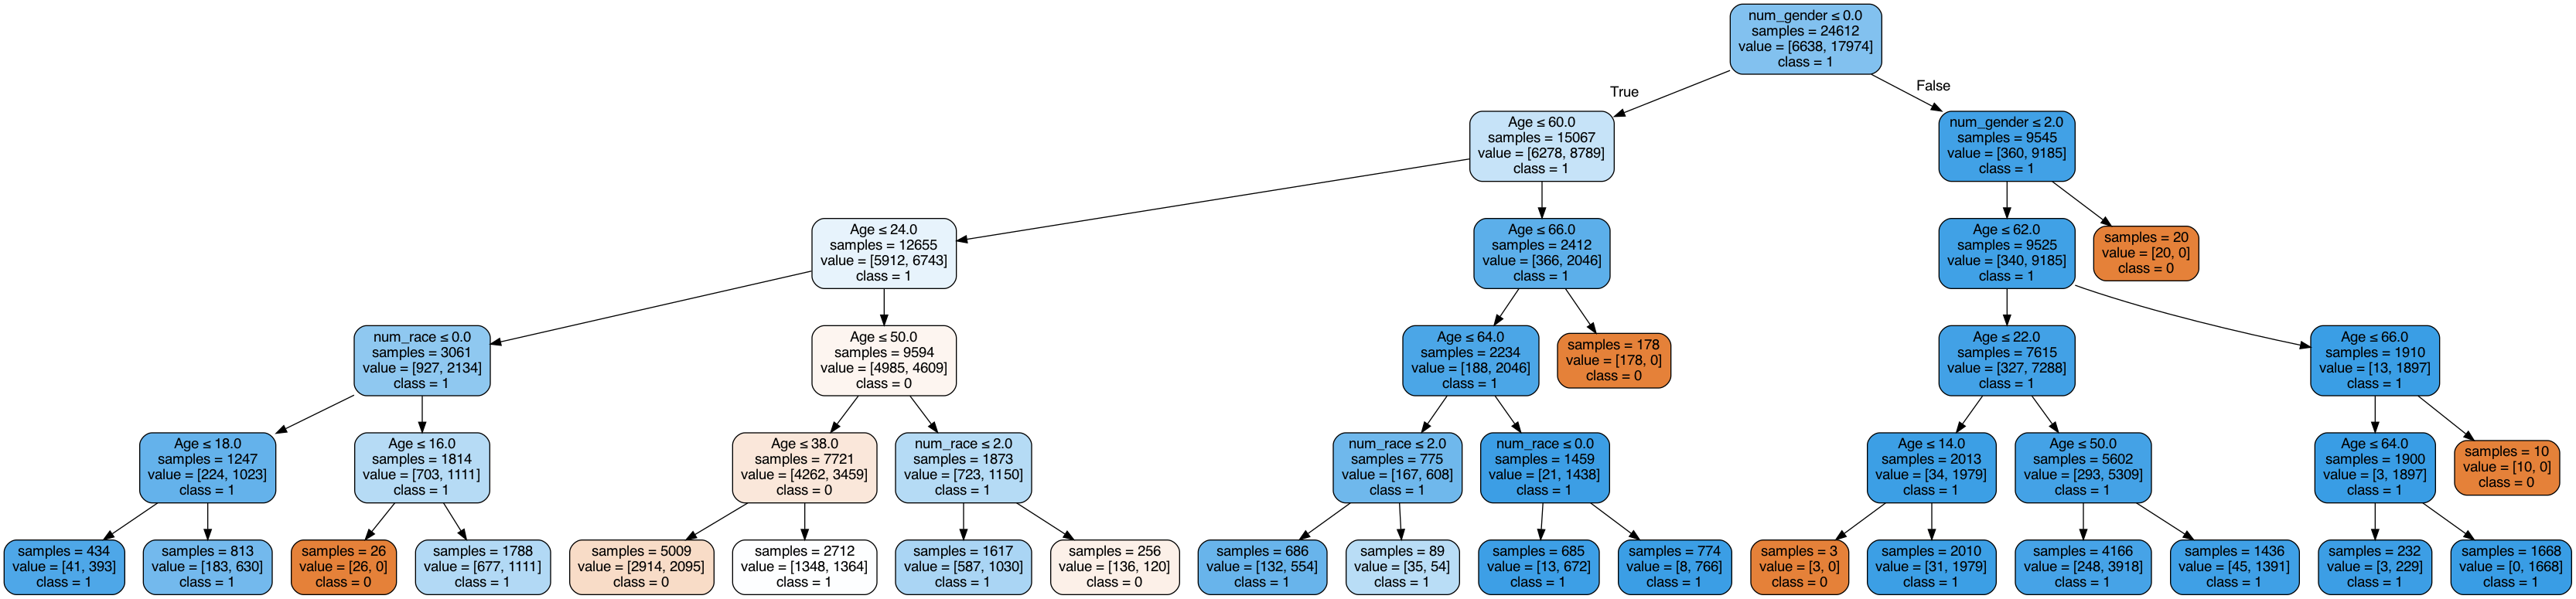

In [52]:
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True, impurity = False, precision=0,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('tree.png')
Image(graph.create_png())

In [46]:
clf = RandomForestClassifier(criterion = 'entropy', max_leaf_nodes=60, max_depth= 5, random_state=0)
clf_fit = clf.fit(X_train, y_train)

In [47]:
y_pred = clf_fit.predict(X_test)
probs = clf_fit.predict_proba(X_train)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7785496648385131


In [48]:
treePred = clf.predict(X)
print(clf.feature_importances_)

[0.03061789 0.57494986 0.39443225]


In [49]:
importances = pd.DataFrame({'feature':feature_cols,'importance':np.round(clf.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False)

In [50]:
importances

,feature,importance
1,num_gender,0.575
2,Age,0.394
0,num_race,0.031


In [12]:
df['dt_predictions'] = treePred
df.to_csv(r'/Users/noahstein/Documents/DA401/df.csv', index = False)

In [13]:
df

,Name,Age,Gender,Race,Date,City,State,Zipcode,County,Agency,...,armedStatus,allegedWeapon,allegedThreat,Fleeing,bodyCam,offDuty,num_race,num_gender,predictions,dt_predictions
0,John Eric Ostbye,50,Male,White,2021-01-25,Graham,WA,98338.0,Pierce,Pierce County Sheriff's Office,...,Allegedly Armed,knife,other,not fleeing,NaN,NaN,0,0,1.0,0.0
1,Tyree Kajawn Rogers,38,Male,Black,2021-01-24,Wichita Falls,TX,76305.0,Wichita Falls,Wichita County Sheriff's Office,...,Vehicle,vehicle,attack,car,no,NaN,1,0,1.0,0.0
2,Caleb McCree,43,Male,White,2021-01-24,Slidell,LA,70460.0,St. Tammany,"Slidell Police Department, St. Tammany Parish ...",...,Allegedly Armed,box cutter,attack,NaN,no,NaN,0,0,1.0,0.0
3,Ryan Daniel Stallings,33,Male,White,2021-01-21,College Station,TX,77840.0,Brazos,College Station Police Department,...,Allegedly Armed,gun,other,not fleeing,no,NaN,0,0,1.0,0.0
4,David Tovar Jr.,27,Male,Hispanic,2021-01-21,San Jose,CA,95127.0,Santa Clara,San Jose Police Department,...,Unclear,undetermined,other,NaN,no,NaN,2,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32812,NaN,47,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
32813,NaN,49,Female,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,1.0,1.0
32814,NaN,44,Male,White,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0,0,1.0,0.0
32815,NaN,65,Male,Black,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,1.0,1.0
